<a href="https://colab.research.google.com/github/edubandeira/data_science/blob/main/An%C3%A1lise%20Airbnb%20-%20Oslo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Oslo*

---

*by [Eduardo Bandeira](https://www.linkedin.com/in/eduardo-bandeira-122b0816a/)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://1000logos.net/wp-content/uploads/2017/08/Airbnb-symbol.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes a cidade de Oslo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados nessa análise foram obtidos diretamente do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nessa análise exploratória inicial será baixado apenas o seguinte arquivo:

* `listings.csv` *Summary information and metrics for listings in Oslo (good for visualisations).*

Com essas informações em mente, vamos ao trabalho!

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/norway/oslo/oslo/2021-07-20/visualisations/listings.csv')


## Análise dos Dados

Nesta análise inicial iremos verificar a estruturação dos dados e criar um dicionário para as variáveis, deixando explícito as informações que cada variável está transmitindo.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel.
* `name` - nome da propriedade anunciada.
* `host_id` - número de id gerado para identificar o anfitrião do imóvel anunciado.
* `host_name` - nome o anfitrião do imóvel.
* `neighbourhood_group` - coluna sem valores válidos.
* `neighbourhood` - nome do bairro onde o imóvel está localizado.
* `latitude` - coordenada latitudinal da propriedade.
* `longitude` - coordenada longitudinal da propriedade.
* `room_type` - informa o tipo de quarto que esta sendo oferecido.
* `price` - preço, em moeda local, para alugar o imóvel (por noite).
* `minimum_nights` - quantidade mínima de noites para alugar a propriedade.
* `number_of_review` - quantidade de avaliações do imóvel.
* `last_review` - data da última avaliação.
* `reviews_per_month` - média de avaliações por mês que aquele imóvel teve.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário.
* `availability_365` - quantidade de dias disponívels dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91201,10.72455,Entire home/apt,1999,3,38,2019-06-19,0.76,2,280
1,69964,Lovely flat in Oslo city centre,175633,Kris,NaN,Sagene,59.94059,10.77397,Entire home/apt,910,28,9,2012-08-10,1.94,1,264
2,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90795,10.77987,Private room,526,4,49,2019-11-09,0.51,1,322
3,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92317,10.71841,Entire home/apt,2209,7,15,2018-08-13,0.13,1,322
4,85902,"Stylish design apt, east. Close to train station",250159,Melissa,NaN,Gamle Oslo,59.91074,10.77232,Entire home/apt,821,5,63,2019-09-28,1.31,2,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O próximo passo é avaliar o tamanho de nosso dataframe e verificar quais são os tipos de dados de cada variável.

* Para verificar o tamanho do dataframe, utilizei o comando `shape`
* Para verificar as informações das variáveis, utilizei o comando `info`

Conforme vemos abaixo, o dataset que utilizaremos para este projeto possuí 16 variáveis e 3392 entradas.

É interessante salientar que o comando `info` nos fornece algumas informações além do que o tipo de dado das variáveis, como por exemplo a quantidade de dados NÃO ausentes em cada *Serie*. Com essa informação ja conseguimos ter uma visão geral sobre os dados ausentes, os quais serão tratados mais adiante. Vale ressaltar que o comando `dtype` pode ser utilizado para retornar apenas o tipo de dado de cada variável.

In [ ]:
# identificar o volume de dados do DataFrame
print('Quantidade de variáveis:', df.shape[1],)
print('Quantidade de entradas:', df.shape[0], '\n')

# verificar as informações das variáveis do dataset
df.info()

Quantidade de variáveis: 16
Quantidade de entradas: 3392 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3392 non-null   int64  
 1   name                            3391 non-null   object 
 2   host_id                         3392 non-null   int64  
 3   host_name                       3392 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3392 non-null   object 
 6   latitude                        3392 non-null   float64
 7   longitude                       3392 non-null   float64
 8   room_type                       3392 non-null   object 
 9   price                           3392 non-null   int64  
 10  minimum_nights                  3392 non-null   int64  
 11  number_of_reviews               3392

Conforme observado acima, a coluna Dtype nos indica que a variável `last_review` se apresenta no formato incorreto, uma vez que os dados são datas. Desta forma, a próxima etapa é realizar a conversão da variável para o formato *datetime*.

In [ ]:
# converter a variável last_review para datetime.
df.last_review = pd.to_datetime(df.last_review, format='%Y-%m-%d')

# analisar as informações novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              3392 non-null   int64         
 1   name                            3391 non-null   object        
 2   host_id                         3392 non-null   int64         
 3   host_name                       3392 non-null   object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   3392 non-null   object        
 6   latitude                        3392 non-null   float64       
 7   longitude                       3392 non-null   float64       
 8   room_type                       3392 non-null   object        
 9   price                           3392 non-null   int64         
 10  minimum_nights                  3392 non-null   int64         
 11  numb

Agora, com cada variável no formato ideal, daremos continuidade à analise.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Tendo os *missing values* como nosso próximo alvo, iremos verificar a quantidade presente em cada variável. Com essa informação em mãos, vamos análisar a melhor tratativa para cada uma das *Series* que possuem valores ausentes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               3392
reviews_per_month                  732
last_review                        732
name                                 1
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
id                                   0
dtype: int64

In [ ]:
# percentual dos dados ausentes de cada variável
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0] * 100

neighbourhood_group               100.000000
reviews_per_month                  21.580189
last_review                        21.580189
name                                0.029481
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

A partir dos procedimentos executados, temos as seguintes informações a serem tratadas:

* A variável `neighbourhood_group` esta completamente vazia e desta forma, podemos descarta-la, visto que não irá interferir nas próximas análises.
* As variáveis `reviews_per_month` e `last_review` possuem a mesma quantidade de valores ausentes, que representam cerca de 21.6% do valor total de entradas. Não é uma opção viável eliminarmos as entradas que contém esses valores pois, com base no tamanho da população, pode ocorrer alguma interferência nas análises posteriores. Desta forma, podemos eliminar as variáveis, uma vez que não pretendemos utiliza-las como referência no decorrer desse projeto. Executando esse procedimento teremos um dataset mais "limpo" e leve para trabalhar.
* A variável `name` possuí apenas um dado ausente. Neste caso, podemos eliminar a entrada a qual esse dado corresponde sem correr o risco de prejudicar nosso dataframe. 

In [ ]:
# eliminar as variáveis reviews_per_month, last_review e neighbourhood_group
df.drop(columns=['reviews_per_month', 'last_review', 'neighbourhood_group'], inplace=True)

# eliminar a entrada que não possuí dado na variável name
df.dropna(axis=0, inplace=True)

# reverificar as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 3391
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3391 non-null   int64  
 1   name                            3391 non-null   object 
 2   host_id                         3391 non-null   int64  
 3   host_name                       3391 non-null   object 
 4   neighbourhood                   3391 non-null   object 
 5   latitude                        3391 non-null   float64
 6   longitude                       3391 non-null   float64
 7   room_type                       3391 non-null   object 
 8   price                           3391 non-null   int64  
 9   minimum_nights                  3391 non-null   int64  
 10  number_of_reviews               3391 non-null   int64  
 11  calculated_host_listings_count  3391 non-null   int64  
 12  availability_365                33

### **Q3. Identificando e tratando Outliers** 

Para tratar dos outliers desse dataframe, seguiremos as seguintes etapas:

* identificar os outliers através das distribuições estatísticas e análise de histogramas e boxplots;
* utilizar a regra do IQR Score para calcular os limites das variáveis que forem necessárias;
* eliminar os outliers que forem identificados com o apoio das tecnicas acima.

In [ ]:
# verificar a distribuição estatística das variáveis
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0
mean,30457779.1,98255848.2,59.9,10.8,1221.1,5.6,22.9,3.1,121.6
std,15474820.7,108502402.6,0.0,0.0,2203.7,25.7,53.7,10.4,129.5
min,42932.0,43067.0,59.8,10.6,100.0,1.0,0.0,1.0,0.0
25%,17680706.5,17544740.0,59.9,10.7,600.0,2.0,1.0,1.0,4.0
50%,33284562.0,52442149.0,59.9,10.8,890.0,2.0,5.0,1.0,75.0
75%,44116125.0,142733169.0,59.9,10.8,1300.0,4.0,20.0,1.0,217.5
max,51144124.0,413715328.0,60.0,10.9,89195.0,900.0,843.0,72.0,365.0


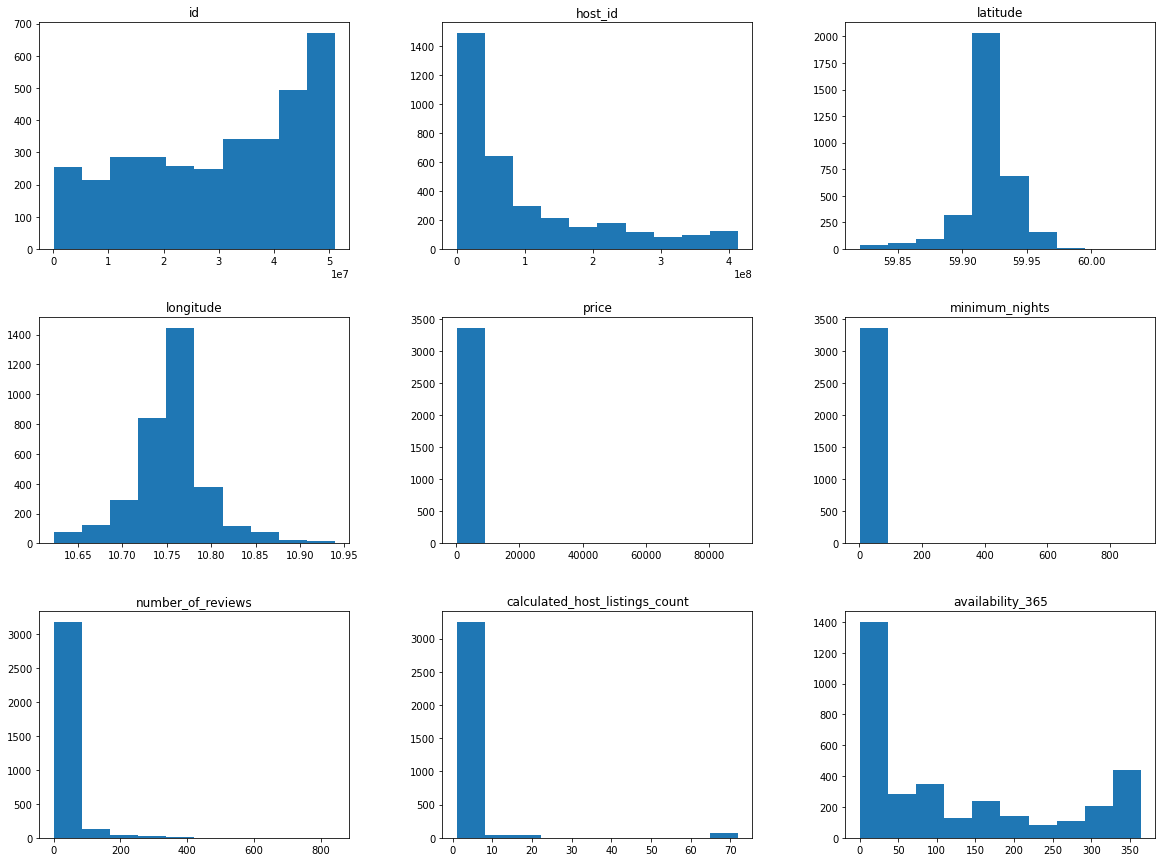

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize =(20,15), grid=False);

Com base nas informações acima, conseguimos levantar alguns pontos:

* A variável `price` possuí seu Q3 em 1300, enquanto o valor máximo está em 89195
* A variável `minimum_nights`, por sua vez, tem seu Q3 em 4 noites, enquanto o valor máximo está em 900 noites.
* O restante das variáveis até podem ter outliers, contudo, para esse projeto, não nos vem ao caso verifica-las mais profundamente 

Sabendo da existência dos outliers das variáveis, vamos ao tratamento destes dados utilizando a regra do IQR Score, que é calculado subtraindo o Terceiro Quartil pelo Primeiro Quartil.

##IQR = Q3 - Q1

Os limites, por sua vez, são calculados da seguinte forma:

###Limite Superior = Q3 + 1.5 * IQR

###Limite Inferior = Q1 - 1.5 * IQR

Note, contudo, que não há valores negativos nas variáveis `price` e `minimum_nights`, o que torna desnecessário o cálculo para o Limite Inferior. Desta forma, realizaremos o cálculo apenas para o limite superior enquanto que para o inferior utilizaremos os valores mínimos como parâmetro.

In [ ]:
# calcular o IQR da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR da variável price: ', iqr_price)

# calcular  o limite superior de price
sup_price = q3_price + 1.5 * iqr_price

print('Limite superior da variável price: ', sup_price)

# calcular o IQR da variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

print('\n\nIQR da variável minimum_nights: ', iqr_minimum_nights)

# calcular o limite superior de minimum_nights
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights

print('Limite superior da variável minimum_nights: ', sup_minimum_nights)

IQR da variável price:  700.0
Limite superior da variável price:  2350.0


IQR da variável minimum_nights:  2.0
Limite superior da variável minimum_nights:  7.0


Com os cálculos dos limites realizados, podemos calcular a quantidade de outliers presentes e plotar um boxplot para ter uma melhor visualização desses outliers.

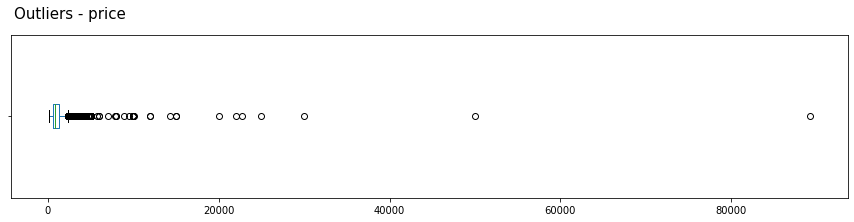

256 Entradas acima de 2350.0
Este valor representa 7.55% do dataset


In [ ]:
# verificar a quantidade de outliers para a variável price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_yticklabels('')
plt.text(-4000, 1.6,'Outliers - price', fontsize = 15)
plt.show()
print('{} Entradas acima de 2350.0'.format(len(df[df.price > 2350])))
print('Este valor representa {:.2f}% do dataset'.format((len(df[df.price > 2350]) / df.shape[0]) * 100))

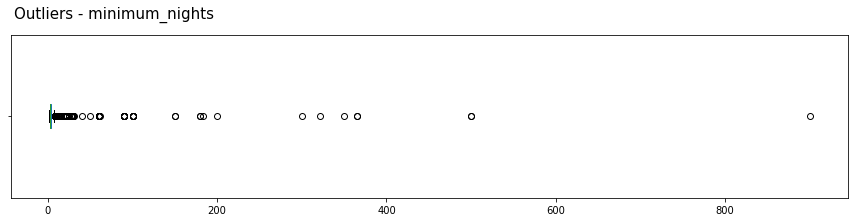

239 Entradas acima de 7.0
Este valor representa 7.05% do dataset


In [ ]:
# verificar a quantidade de outliers para a variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_yticklabels('')
plt.text(-40, 1.6,'Outliers - minimum_nights', fontsize = 15)
plt.show()
print('{} Entradas acima de 7.0'.format(len(df[df.minimum_nights > 7])))
print('Este valor representa {:.2f}% do dataset'.format((len(df[df.minimum_nights > 7]) / df.shape[0]) * 100))

Realizado os cálculos acima, notamos que há 7.55% de outliers para a variável price e 7.05% para a variável minimum_nights. Isso quer dizer que, se considerarmos eliminar todos os outliers iremos abrir mão de, no máximo, 14.60% do dataframe, o que podemos considerar, para as análises que iremos realizar e considerando o tamanho total do dataset, um percentual aceitável.

Desta forma, a próxima etapa é eliminar os outliers.

In [ ]:
# limpar os outliers
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 2350].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)
perc_total = (df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100


print('Percentual do dataset eliminado: {:.2f}%.'.format(perc_total))

Percentual do dataset eliminado: 14.04%.


Com os outliers limpos, a partir deste ponto iremos considerar o novo dataframe `df_clean` para as análises seguintes. Para uma melhor comparação visual, abaixo temos os boxplots da nova base de dados. 

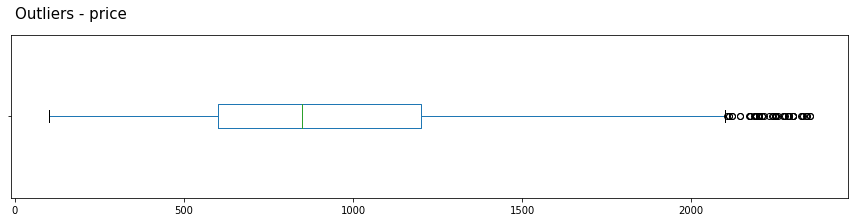

In [ ]:
# boxplot df_clean para a variável price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_yticklabels('')
plt.text(0, 1.6,'Outliers - price', fontsize = 15)
ax.set_ylabel('')
plt.show()

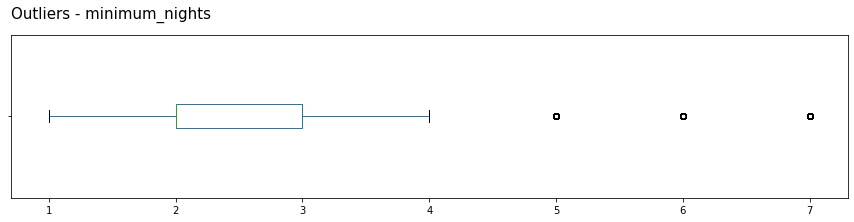

In [ ]:
# boxplot df_clean para a variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_yticklabels('')
plt.text(0.70, 1.6,'Outliers - minimum_nights', fontsize = 15)
plt.show()

### **Q4. Qual a média dos preços de aluguel?**
Com os dados devidamente tratados, podemos começar as análises propriamente dita. A primeira análise que iremos realizar é verificar qual o preço médio dos alugueis para a cidade de Oslo. Para isso, podemos utilizar a função `mean()`.

In [ ]:
# ver a média da coluna price
print('Preço médio dos aluguéis:', df_clean.price.mean())

Preço médio dos aluguéis: 945.7173241852487


### **Q5. Qual a correlação existente entre as variáveis**
A análise da correlação entre os dados irá nos indicar, de forma descritiva, se existe e qual o tipo de relação entre as variáveis. Para esta verificação, consideraremos o coeficiente de Person, que classifica a correlação entre duas variáveis com valores entre -1 e 1, podendo ocorrer três possíveis cenários:

* **Correlação Positiva:** coeficiente mais próximo do 1, ocorre quando duas variáveis possuem relação direta;
* **Correlação Negativa:** coeficiente mais próximo do -1, ocorre quando duas variáveis possuem relação indireta;
* **Não há correlação:** coeficiente mais próximo do 0, ocorre quando duas variáveis não possuem relação.

In [ ]:
# criar a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.140683,-0.098991,-0.067933,0.063838
minimum_nights,0.140683,1.000000,-0.141782,0.003309,-0.066615
number_of_reviews,-0.098991,-0.141782,1.000000,-0.012602,0.059671
calculated_host_listings_count,-0.067933,0.003309,-0.012602,1.000000,0.221015
availability_365,0.063838,-0.066615,0.059671,0.221015,1.000000


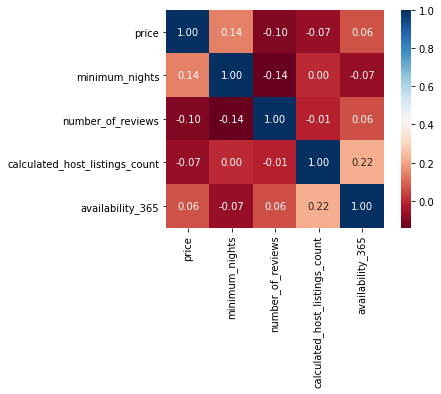

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Como é possível verificar, nenhuma das variáveis possuem uma correlação significante entre sí. A melhor relação que podemos observar é entre as variáveis `calculated_host_listings_count`, que indica a quantidade de imóveis do mesmo proprietário e `availability_365`, que indica a quantidade de vagas disponíveis dentro de 365 dias. Sendo assim, quanto mais propriedades um anfitrião disponibilizar para hospedagem, maior será a quantidade de dias disponíveis dentro do período de um ano.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. No site existe a opção de alugar apartamentos/casas inteiras, apenas um quarto ou até mesmo dividir um quarto com outras pessoas.

Vamos verificar a quantidade de ocorrências de cada tipo de aluguel utilizando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    2293
Private room        600
Shared room          22
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    78.662093
Private room       20.583190
Shared room         0.754717
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara em Oslo?**
Uma maneira de verificar uma variável em função da outra é usando `groupby()`. Nesse caso, iremos comparar os preços de locação em cada bairro.

In [ ]:
# ver média dos preços por bairro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Marka                1081.461538
Sentrum              1077.886364
Vestre Aker          1062.340206
Frogner              1050.750524
Nordstrand           1047.818966
Stovner              1046.555556
Nordre Aker           985.280899
St. Hanshaugen        947.876344
Grünerløkka           924.688969
Ullern                915.641304
Gamle Oslo            909.008247
Sagene                883.291228
Bjerke                845.842105
Østensjø              827.042254
Alna                  727.958333
Søndre Nordstrand     673.292683
Grorud                666.045455
Name: price, dtype: float64

Para quem não conhece a cidade de Oslo, é possível verificarmos se os bairros com o maior preço do aluguel são os lugares realmente mais caros ou se estamos lidando com uma amostra não-representativa, pois pode ocorrer casos em que poucas ofertas 
'puxam' o preço médio de aluguel para cima.

In [ ]:
# verificar quanditade de imóveis no Marka
print('O bairro Marka possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Marka"].shape[0]))

# verificar quantidade de imóveis no Sentrum
print('O bairro Sentrum possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Sentrum"].shape[0]))

# verificar quantidade de imóveis no Vestre Aker
print('O bairro Vestre Aker possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Vestre Aker"].shape[0]))

# verificar quantidade de imóveis no Frogner
print('O bairro Frogner possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Frogner"].shape[0]))

# verificar quantidade de imóveis do Nordstrand
print('O bairro Nordstrand possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Nordstrand"].shape[0]))

# verificar quantidade de imóveis do Stovner
print('O bairro Stovner possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Stovner"].shape[0]))

# verificar quantidade de imóveis do Nordre Aker
print('O bairro Nordre Aker possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Nordre Aker"].shape[0]))

# verificar quantidade de imóveis do St. Hanshaugen
print('O bairro St. Hanshaugen possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "St. Hanshaugen"].shape[0]))

# verificar quantidade de imóveis do Grünerløkka
print('O bairro Grünerløkka possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Grünerløkka"].shape[0]))

# verificar quantidade de imóveis do Ullern
print('O bairro Ullern possui {} ofertas.'.format(df_clean[df_clean.neighbourhood == "Ullern"].shape[0]))


O bairro Marka possui 13 ofertas.
O bairro Sentrum possui 88 ofertas.
O bairro Vestre Aker possui 97 ofertas.
O bairro Frogner possui 477 ofertas.
O bairro Nordstrand possui 116 ofertas.
O bairro Stovner possui 9 ofertas.
O bairro Nordre Aker possui 89 ofertas.
O bairro St. Hanshaugen possui 372 ofertas.
O bairro Grünerløkka possui 553 ofertas.
O bairro Ullern possui 92 ofertas.


Conforme é possível verificar, o bairro Marka e o bairro Stovner possuem apenas 13 e 9 ofertas, respectivamente, o que é uma quantidade baixa se comparado com os outros bairros analisados. Desta forma, podemos inferir que, com exceção desses dois bairros, os outros possuem, de fato, os maiores preços médios para aluguel em Oslo.


Dando continuidade, podemos plotar os pontos de cada imóvel ofertado, pois temos as informações de Lagitude e Longitude. Para isso, considera-se `x=longitude` e `y=latitude`.

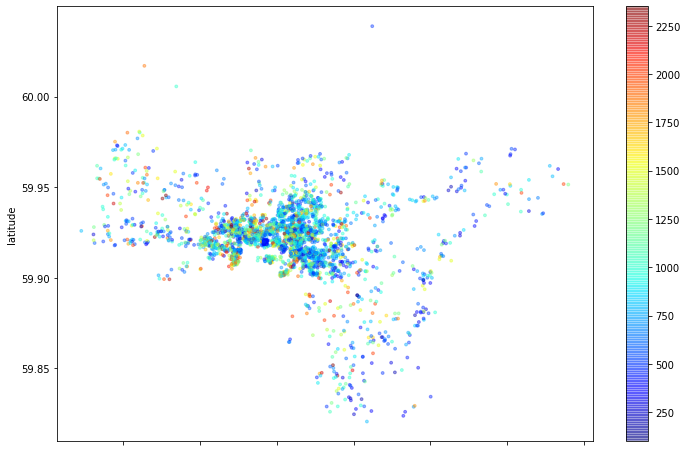

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Tendo em mente que a variável `minimum_nights` nos informa o mínimo de noites para cada imóvel, podemos analisar a média utilizando `mean()`.

In [ ]:
# ver a média da coluna `minimum_nights`
print('Média do mínimo de noites para aluguel: ', df_clean.minimum_nights.mean())

Média do mínimo de noites para aluguel:  2.7365351629502572


## **Conclusões**
Com base nos procedimentos executados e apesar de terem sido superficiais, constatamos a presença de dados ausentes e *outliers* o que nos indica que mesmo uma base de dados relativamente pequena e simples pode demandar de determinadas análises para que seja possível extrair informações verdadeiras. 

Também observamos que a cidade de Oslo não possuí opção de aluguel de Hotel por meio do Airbnb e que o principal tipo de aluguel ofertado são os apartamentos/casas inteiras.

Além disso, verificamos que algumas regiões da cidade Norueguesa possuem poucas ofertas de aluguel, o que pode acabar aumentando o valor médio das propriedades que estão sendo oferecidas. É importante descatar também que a maior quantidade de opções se encontra na região do centro da cidade, próximo aos principais destinos turísticos de quem visita a cidade.

Por fim, lembramos que a base utilizada nessa análise é uma versão resumida, ideal para o que foi proposto nesse projeto de uma abordagem inicial. Para um estudo mais aprofundado é recomendado que seja utilizado a versão completa, contendo 106 atributos.
